## Import sympy

In [1]:
from sympy import *
import numpy as np

init_printing(use_unicode=True)

## Transforming symbolic variables and symbolic matrix T_{i-1, i}

In [2]:
def create_variables(i):
    alpha = Symbol('alpha_{0}'.format(i-1))
    a = Symbol('a_{0}'.format(i-1))
    d = Symbol('d_{0}'.format(i))
    theta = Symbol('theta_{0}'.format(i))
    return alpha, a, d, theta

def create_matrix(alpha, a, d, theta):
    T = Matrix([[cos(theta), -sin(theta), 0, a], 
              [sin(theta)*cos(alpha), cos(theta)*cos(alpha), -sin(alpha), -sin(alpha)*d], 
              [sin(theta)*sin(alpha), cos(theta)*sin(alpha), cos(alpha),  cos(alpha)*d],
              [0, 0, 0, 1]])
    return T

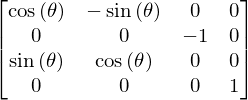

In [3]:
create_matrix(pi/2, 0, 0, Symbol('theta'))

## Parameters of the robot

In [4]:
n_frames = 5

# here we should input our parameters, which depend on configuration
table = [[pi/2,  0, 0,             Symbol('theta_1') - pi/2],
         [-pi/2, 0, 0,             Symbol('theta_2') + pi/2],
         [pi/2,  0, Symbol('L_1'), Symbol('theta_3') + pi/2],
         [-pi/2, 0, 0,             Symbol('theta_4') - pi/2],
         [0,     Symbol('L_2'),    0, 0]]

In [5]:
n_frames = 5

# here we should input our parameters, which depend on configuration
table = [[0,  0,             0, Symbol('theta_1')],
         [0,  Symbol('L_1'), 0, Symbol('theta_2')],
         [0,  Symbol('L_2'), 0, 0]]

## Calculating 

In [5]:
transformation_matrices = [create_matrix(*inputs) for inputs in table]

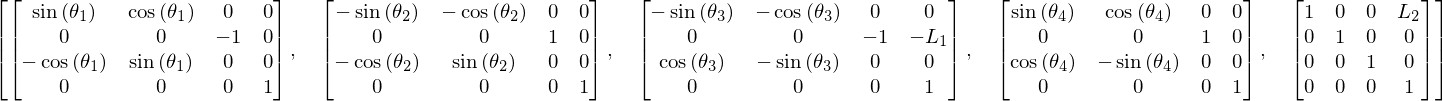

In [6]:
transformation_matrices

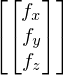

In [7]:
F = Matrix([Symbol('f_x'), Symbol('f_y'), Symbol('f_z')])
fs = [F]
ns = [Matrix([0, 0, 0])]
fs

In [8]:
def find_prev(f, n, t):
    r, p = t[:3, :3], t[:-1, 3]

    f_prev = r * f
    n_prev = r * n + p.cross(f_prev)
    return f_prev, n_prev

In [9]:
for t in reversed(transformation_matrices[1:]):
    f, n = find_prev(fs[0], ns[0], t)
    ns.insert(0, n)
    fs.insert(0, f)

In [15]:
taus = [n[2] for n in ns]
simplify(taus[:-1])

## Substituting paramteres to T_final

In [18]:
tau = taus[-2]

In [22]:
[tau.subs({Symbol('f_x'): 10 * Symbol('N'),
         Symbol('f_y'): 8 * Symbol('N'),
         Symbol('f_z'): 5 * Symbol('N'),
         Symbol('L_1'): 0.3 * Symbol('m'),
         Symbol('L_2'): 0.25 * Symbol('m'),
         Symbol('theta_1'): 0,
          Symbol('theta_2'): 0,
          Symbol('theta_3'): 0,
          Symbol('theta_4'): 0})
 for tau in taus[:-1]]